<h2>Classificação: Iris dataset</h2>

<h3>Importando dados</h3>

Primeiro é necessário importar algumas bibliotecas. Importaremos as bibliotecas pandas (para trabalhar com Data Frame), numpy (para trabalhar com arrays) e matplotlib.pyplot (para fazer alguns gráficos. Utilizaremos as respectivas abreviações, pd, np e plt. Todas essas bibliotecas são muito importantes e devem ser estudadas frequentemente.

In [7]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# utilizaremos o ggplot para melhores gráficos
plt.style.use('ggplot')

A biblioteca sklearn já possui alguns conjuntos de dados. Importaremos o conjunto de dados Iris.

In [8]:
# importando datasets
from sklearn import datasets
# carregando iris dataset
iris = datasets.load_iris()

Para saber quais atributos do objeto iris, usamos o métodos keys.

In [9]:
# atributos de um dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Exploraremos cada um desses atributos:

In [10]:
# vejamos o tipo do objeto iris.data
type(iris.data)

numpy.ndarray

In [11]:
# as dimensões do objeto iris.data
iris.data.shape

(150, 4)

In [12]:
# A descrição do dataset
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Observamos que o dataset tem 4 features e 150 amostras de espécies da flor Iris. As espécies estão divididas em 3 classes, iris-setora, iris-versicolor e iris-virginica.

In [13]:
# Quais o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Para usar os métodos associados ao objeto DataFrame da biblioteca pandas, faz-se necessário transformar o dataset em um objeto do tipo DataFrame:

In [14]:
# criando iris DataFrame
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Explorando os dados</h3>

É importante a análise exploratória do dataset antes de começar a criar modelos que descrevem padrões sobre as features e o target. Utilizaremos agora alguns métodos comuns de exploração de dados.

In [15]:
# estatísticas básicas
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Observe que os valores de máximos e mínimos para as features estão dentro do real, em outras palavras, não há outliers. No entanto, ainda será necessário normalizar os dados durante o preprocessamento por se tratarem de features com características bem distintas.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Observe que não há entradas nulas no dataset. Isso nos poupará algum tempo no preprocessamento. Alguns gráficos podem nos fornecer maiores informações sobre as relações entre as features. Utilizaremos a biblioteca seaborn para criar gráficos mais estilizados.

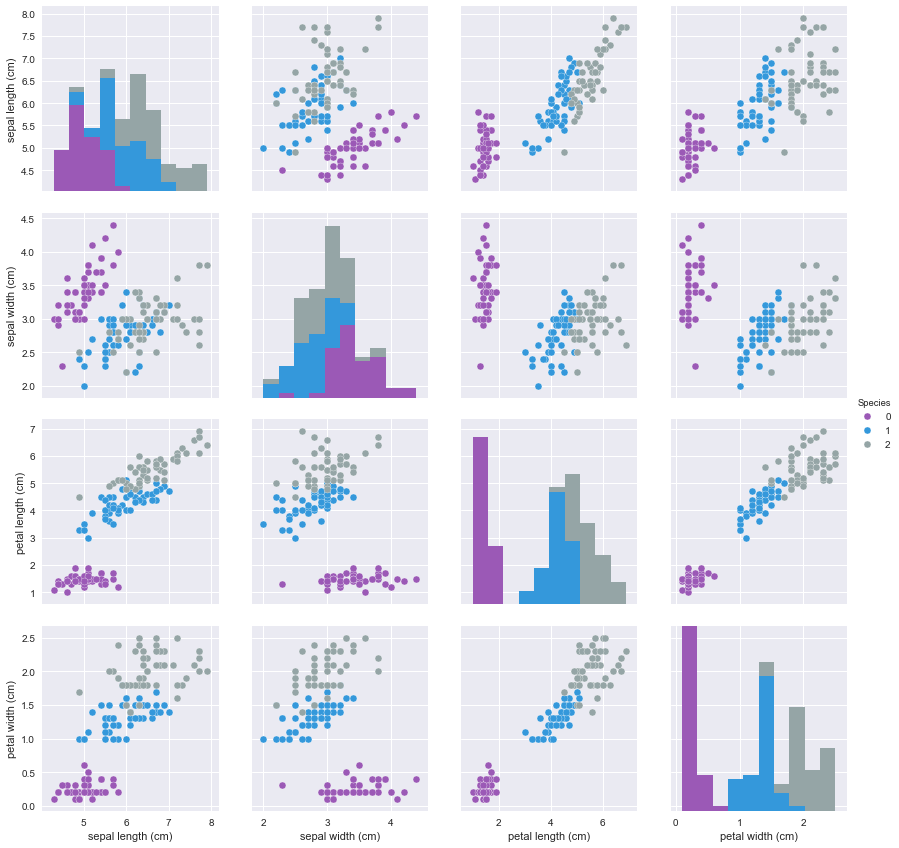

In [17]:
import seaborn as sns
# Escolhendo as cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# criando gráfico para visualização de relações de 2 a 2 features
sns.pairplot(df, hue='Species', palette=flatui, vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], size=3,diag_kind="hist")
plt.show()

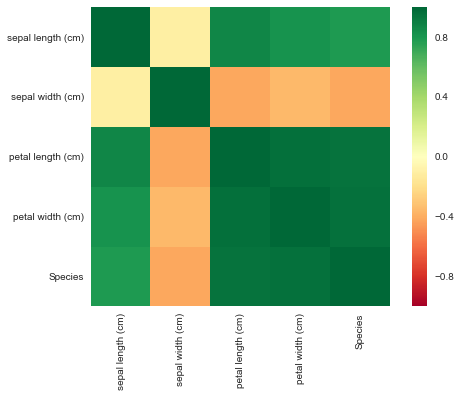

In [18]:
# Explorando correlações com seaborn
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

Para construir o próximo gráfico utilizaremos diversos métodos. Não se preocupe em entender tudo rapidamente. Tente estudar comando por comando até ter uma visão completa do que foi feito.

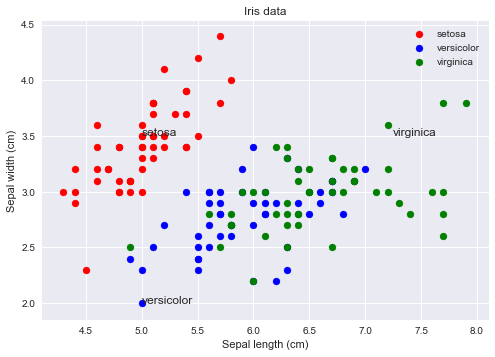

In [19]:
# filtrando por setosas
setosa = df[df['Species']==0] 
# filtrando por versicolors
versicolor = df[df['Species']==1] 
# filtrando por virginica
virginica = df[df['Species']==2]
# extraindo os valores de comprimento e largura do talo de cada uma das espécies
setosa_len = setosa['sepal length (cm)'].values
setosa_wid = setosa['sepal width (cm)'].values
versicolor_len = versicolor['sepal length (cm)'].values
versicolor_wid = versicolor['sepal width (cm)'].values
virginica_len = virginica['sepal length (cm)'].values
virginica_wid = virginica['sepal width (cm)'].values
# plotando comprimento x largura do talo das setosas (em vermelho)
plt.scatter(setosa_len,setosa_wid,color='red',label='setosa')
# plotando comprimento x largura do talo das versicolors (em azul)
plt.scatter(versicolor_len,versicolor_wid,color='blue',label='versicolor')
# plotando comprimento x largura do talo das virginicas (em verde)
plt.scatter(virginica_len,virginica_wid,color='green',label='virginica')
# posicionando a legenda no canto superior direito
plt.legend(loc='upper right')
# colocando o título
plt.title('Iris data')
# rotulando o eixo x
plt.xlabel('Sepal length (cm)')
# rotulando o eixo y
plt.ylabel('Sepal width (cm)')
# colocando algumas anotações em pontos específicos (xy)
plt.annotate('setosa',xy=(5.0,3.5))
plt.annotate('virginica',xy=(7.25,3.5))
plt.annotate('versicolor',xy=(5.0,2.0))
# mostrando o gráfico
plt.show()

<h3>Preprocessamento</h3>

No preprocessamento preparamos os dados para serem ajustados aos modelos. Algumas técnicas são muito comuns nesse estágio. Porém, como o dataset iris já está praticamente pronto, faltando apenas a normalização, apenas mencionaremos algumas das técnicas mais comuns sem aplicá-las.
<ul>
    <li> Tratamento de dados perdidos </li>
    <li> Redução de dimensionalidade </li>
    <li> Discretização de features categóricas </li>
    <li> Tratamento de outliers </li>
    <li> Escolha das features </li>
    <li> Normalização dos dados </li>
</ul>

In [20]:
# normalizando
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

<h3>Modelagem</h3>

Podemos criar um modelo de várias formas. Todo o processo é bem parecido. Para ilustrar o processo, utilizaremos o KNeighborsClassifier:

In [21]:
# importa o modelo
from sklearn.neighbors import KNeighborsClassifier
# cria o modelo (escolhemos o parâmetro n_neighbors=6)
knn = KNeighborsClassifier(n_neighbors=6)
# ajustamos o modelo aos dados
knn.fit(X, y)
# avaliamos o quanto o modelo representa os dados
knn.score(X,y)

0.96666666666666667

Os passos acima resumem o processo de modelagem. No entanto, para melhores resultados, devemos ser mais metodológicos em cada uma das etapas do processo. Mas, por agora, para se ter uma visão geral, vejamos quais foram os passos:
<ol>
    <li> Importar o modelo </li>
    <li> Escolher os parâmetros </li>
    <li> Criar o modelo </li>
    <li> Ajustar o modelo aos dados </li>
    <li> Avaliar o modelo </li>
</ol>    

<h4>Importando o modelo</h4>

Existem vários modelos de machine learning na literatura e a biblioteca sklearn possui vários desses. Nosso problema aqui é classificar as espécies de iris dado suas características. Para isso dispomos de um conjunto de 150 amostras já classificadas. Isso é um típico problema de classificação com aprendizado supervisionado. Um dos modelos mais famosos para esse problema é o knn. Existem outros modelos como o Extra trees, Random Forest, Gradient Boosting, etc (experimente usar alguns desses). Para esse tutorial, escolhemos o knn.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

<h4> Escolhendo os parâmetros do modelo </h4>

Todos os modelos possuem vários parâmetros e já com seus valores default. No entanto, escolher parâmetros certos aumenta a precisão de seus modelos. Para isso é usado uma técnica chamada de tunagem de hiperparâmetros. Essa técnica consiste em testar vários parâmetros até obter o melhor modelo. No entanto, seu modelo obter uma precisão muito alta em relação ao seu conjunto de dados, não significa que ele é bom. Para ser bom, ele tem que obter uma precisão alta em dados diferentes daqueles usados para a tunagem dos hiperparâmetros. Logo, usaremos uma parte dos dados (traning set) para treinar o modelo e outra parte (test set) para testar nosso modelo. Vejamos como podemos fazer isso com a biblioteca sklearn.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

Usaremos o X_train e y_train para treinar nosso modelo e o X_test e y_test para testá-lo. Para escolher os parâmetros melhores (tunagem de hiperparâmetros) usaremos uma ferramenta chamada GridSearch, também encontrada na biblioteca sklearn.

In [24]:
# importando GridSeachCV
from sklearn.model_selection import GridSearchCV
# criando a grade
param_grid = {'n_neighbors':np.arange(1,50)}
# criando o modelo default
knn = KNeighborsClassifier()
# criando o modelo a ser tunado
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# tunando
knn_cv.fit(X_train,y_train)
# mostrando os melhoes parâmetros e o melhor score
knn_cv.best_params_, knn_cv.best_score_

({'n_neighbors': 5}, 0.96190476190476193)

Nossa tunagem testou todos os modelos knn com o parâmetro 'n_neighbors' variando de 1 a 50. Dentre todos esses, o que obteve melhor precisão (avaliada via validação cruzada com k=5) foi aquele no qual n_neighbors=5. O score máximo obtido foi de 96,19% de acurácia.

<h4>Criando o modelo</h4>

Como vimos anteriormente, o melhor "chute" para ter um knn com alta precisão é escolher o parâmetro n_neighbors=5. Vejamos:

In [25]:
# criando o modelo com parâmetros tunados
knn = KNeighborsClassifier(n_neighbors=5)
# ajustando o modelo aos conjunto de treino
knn.fit(X_train,y_train)
# gerando as classificações para o conjunto de test
y_pred = knn.predict(X_test)

<h4>Avaliando o Modelo</h4>

Existem várias métricas para avaliar o quanto seu modelo é bom. Veremos aqui algumas delas.

In [26]:
# testar o modelo no test
knn.score(X_test,y_test)

0.93333333333333335

A métrica acima consiste em pegar as classificações obtidas através do modelo e comparará-las às classificações reais. Não se recomenda utilizar esse processo. O processo mais utilizado é a matriz de confusão e as métricas associadas a esta.

<h5>Confusion Matrix</h5>

A matriz de confusão é uma tabela onde consta o número de classsificações falsas positvas, faltas negativas, verdadeiras positivas e verdadeiras negativas para cada classe envolvendo o problema. Um exmeplo de matriz de confusão para duas classes é ilustrado pela tablea abaixo:

<table>
    <tr>
        <td>True positive (tp)</td>
        <td>False negative (fn)</td>
    </tr>
    <tr>
        <td>False positive (fp)</td>
        <td>True negative (tn)</td>
    </tr>
</table>

Algumas métricas associadas a matriz de confusão são:

$$\text{Accuracy:}\ \frac{tp + tn}{tp + tn + fp + fn}$$

$$\text{Precision:}\ \frac{tp}{tp + fp}$$

$$\text{Recall:}\ \frac{tp}{tp + fn}$$

$$\text{F1-score:}\ \  2 * \frac{Precision * Recall}{Precision + Recall}$$

Para mais métricas e maiores informações sobre matriz de confusão clique <a href='https://en.wikipedia.org/wiki/Confusion_matrix'>aqui</a>.

In [27]:
# utilizando matriz de confusão e métricas associadas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])

Das setosas, o modelo knn treinado acertou 15 de 15 (true positive). Das versicolors, das 15, o modelo acertou 14. A versicolor que foi classificada incorretamente, foi classificada como virginica. Das virginicas, 2 das 15 foram classificadas como versicolors. As outras 13 foram classificadas corretamente.

In [28]:
# métricas advindas da matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.88      0.93      0.90        15
          2       0.93      0.87      0.90        15

avg / total       0.93      0.93      0.93        45



<h3>Random forest, uma degustação</h3>

Sem entrar em detalhes, utilizaremos Random forest no lugar de knn. Tente estudar e indenticar as diferenças e semelhanças com o que foi feito anteriormente. Você pode limpar os outputs e inicar seu kernel desse ponto, uma vez que todas os métodos e bibliotecas serão importados novamente. Bons estudos!

In [2]:
# importando pandas como pd
import pandas as pd
# importando numpy como np
import numpy as np
# importando datasets da biblioteca sklearn
from sklearn import datasets
# carregando iris dataset
iris = datasets.load_iris()
# criando iris DataFrame
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
# normalizando df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# importando o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier
# separando o conjunto de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
# importando GridSeachCV
from sklearn.model_selection import GridSearchCV
# criando a grade
param_grid = {
    'n_estimators':np.arange(10,40),
    'max_depth':np.arange(1,10),
    'max_features':np.arange(1,4),
    'criterion': ['gini','entropy']
}
# criando o modelo default
forest = RandomForestClassifier()
# criando o modelo a ser tunado
forest_cv = GridSearchCV(forest, param_grid, cv=5)
# tunando
forest_cv.fit(X_train,y_train)
# mostrando os melhoes parâmetros e o melhor score
forest_cv.best_params_, forest_cv.best_score_

({'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'n_estimators': 13},
 0.97142857142857142)

In [6]:
# criando o modelo com parâmetros tunados
forest = RandomForestClassifier(
    criterion='gini', 
    max_depth=2, 
    max_features=2, 
    n_estimators=13
)
# ajustando o modelo aos conjunto de treino
forest.fit(X_train,y_train)
# gerando as classificações para o conjunto de test
y_pred = forest.predict(X_test)
# avaliando o modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# gerando matriz de confusão
print(confusion_matrix(y_test,y_pred))
# gerando métricas associadas
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.87      0.90        15
          2       0.88      0.93      0.90        15

avg / total       0.93      0.93      0.93        45

